1. Name - Humera Bano
2. USC ID - 7255691039
3. Github ID - humera811

In [ ]:
# sorting all imports together

from tensorflow import keras
import tensorflow as tf
import pandas as pd
import os
import random
from google.colab import drive
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import glob
import matplotlib.pyplot as plt
import math
from PIL import Image
import cv2
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.applications.vgg16 import VGG16

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1. Transfer Learning for Image Classification**

1. It is highly recommended that you complete this project using Keras
2 and Python.

#### **(a) In this problem, we are trying to build a classifier that distinguishes images of 20 bird species. You are provided with text data in twenty folders**

In [ ]:
bird_data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Final-Project/Data/Classes.xlsx', header = [0])
bird_data

,Folder Name,Class
0,005.Crested_Auklet,0
1,013.Bobolink,1
2,015.Lazuli_Bunting,2
3,023.Brandt_Cormorant,3
4,040.Olive_sided_Flycatcher,4
5,041.Scissor_tailed_Flycatcher,5
6,067.Anna_Hummingbird,6
7,072.Pomarine_Jaeger,7
8,076.Dark_eyed_Junco,8
9,081.Pied_Kingfisher,9


### **(b) Data Exploration and Pre-processing**

i. Images in each class are given in separate folders. The file Classes.xlsx pro-
vides the classes assigned to the bird species images in each folder. Therefore,
you encode your classes using one-hot encoding and
Classes.xlsx
.

ii.
Randomly select
d
0
.
7
n
i
e
images from each folder as your training set,
d
0
.
15
n
i
e
as validation set, and the rest as your test set, where
n
i
is the number of
images in folder
i
and
d
x
e
is the ceiling of
x


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# https://www.tutorialspoint.com/python/os_listdir.htm
# https://www.geeksforgeeks.org/python-os-listdir-method/

imgPath = 'drive/MyDrive/Colab Notebooks/Final-Project/Data/images/'
# using One hot encoder
enc = OneHotEncoder(sparse=False)
enc_val = enc.fit_transform(bird_data.values)
imgClassSet = []

for path in os.listdir(imgPath):
    if path != '.DS_Store':
        sub_path = os.path.join(imgPath, path)
        count = 0
        for p in os.listdir(sub_path):
            if os.path.isfile(os.path.join(sub_path, p)):
                count +=1 
        imgClassSet.append((sub_path, count))
train_ds = []
test_ds = []
val_ds = []

# referring to piazza post @2023
# https://docs.python.org/3/library/glob.html
for fold in imgClassSet:
    all_ds = glob.glob(fold[0]+"/*.jpg")
    train_lt = random.sample(all_ds, math.ceil(0.7*fold[1]))
    train_ds.extend(train_lt)
    remain_ds = [img for img in all_ds if img not in train_lt] 
    val_lt = random.sample(remain_ds, math.ceil(0.15*fold[1])) # 15 percent ceil
    val_ds.extend(val_lt)
    test_ds.extend([img for img in remain_ds if img not in val_lt])
    
# all_ds = tf.keras.utils.image_dataset_from_directory('drive/MyDrive/Colab Notebooks/project/Data/images/',
#                                                     batch_size=None,
#                                                     label_mode = 'categorical',
#                                                      image_size=(224,224))
# images = np.asarray(list(all_ds.map(lambda x, y: x)))
# labels = np.asarray(list(all_ds.map(lambda x, y: y)))

print("Train set size : {} ".format(str(len(train_ds))))
print("Test set size : {}".format(str(len(test_ds))))
print("Validation set size : {}".format(str(len(val_ds))))

Train set size : 827 
Test set size : 171
Validation set size : 178


### **iii. In order for all the images to have the same size, zero-pad or resize the images in your dataset. This can be done using various tools, including OpenCV**

In [ ]:
# https://www.geeksforgeeks.org/delete-an-entire-directory-tree-using-python-shutil-rmtree-method/
# https://docs.python.org/3/library/shutil.html

if os.path.isdir("../Data/train"):
    shutil.rmtree("../Data/train")  #removing train folder
if os.path.isdir("../Data/test"):
    shutil.rmtree("../Data/test") #removing test folder
if os.path.isdir("../Data/validation"):
    shutil.rmtree("../Data/validation") #removing val folder

# https://docs.python.org/3/library/os.html
# https://www.geeksforgeeks.org/python-os-makedirs-method/
if not os.path.isdir("../Data/train"):
    os.makedirs("../Data/train") # craeting new train folder 
if not os.path.isdir("../Data/test"):
    os.makedirs("../Data/test") # craeting new test folder
if not os.path.isdir("../Data/validation"):
    os.makedirs("../Data/validation") # craeting new val folder

In [ ]:
# https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/
# OpenCV
for imgFile in train_ds:
    image = cv2.imread(imgFile)
    resizedImg = cv2.resize(image, (224, 224)) #resizing
    birdNames = imgFile.split('/')
    if not os.path.isdir("../Data/train/"+(birdNames[-2])):
        os.makedirs("../Data/train/"+birdNames[-2])
    cv2.imwrite("../Data/train/"+birdNames[-2]+"/"+"224_"+birdNames[-1], resizedImg)

In [ ]:
for imgFile in val_ds:
    image = cv2.imread(imgFile)
    resizedImg = cv2.resize(image, (224, 224)) # validation set resize
    birdNames = imgFile.split('/')
    if not os.path.isdir("../Data/validation/"+(birdNames[-2])):
        os.makedirs("../Data/validation/"+birdNames[-2])
    cv2.imwrite("../Data/validation/"+birdNames[-2]+"/"+"224_"+birdNames[-1], resizedImg)

In [ ]:
for imgFile in test_ds:
    image = cv2.imread(imgFile)
    resizedImg = cv2.resize(image, (224, 224)) # test set resize
    birdNames = imgFile.split('/')
    if not os.path.isdir("../Data/test/"+(birdNames[-2])):
        os.makedirs("../Data/test/"+birdNames[-2])
    cv2.imwrite("../Data/test/"+birdNames[-2]+"/"+"224_"+birdNames[-1], resizedImg)

Image - Before we resize it :
(500, 369)


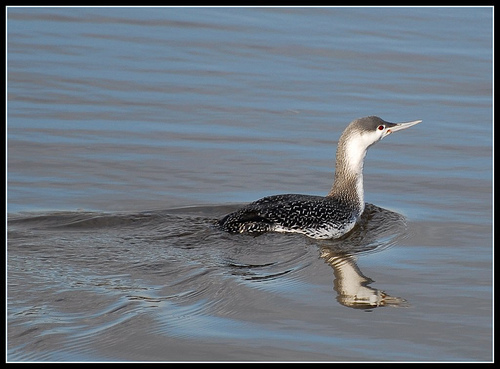

In [ ]:
# before resizing 
print(f"Image - Before we resize it :")
image = Image.open(test_ds[40])
print(image.size)
display(image)



Image - After we have resized it :
(224, 224)


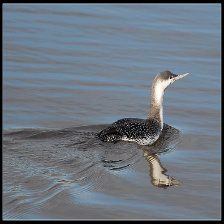

In [ ]:
print("\n")
print(f"Image - After we have resized it :")
names = test_ds[40].split('/')
image = Image.open('../Data/test/'+names[-2]+'/'+'224_'+names[-1])
print(image.size)
display(image)

### **(c) Transfer Learning**
3 i.
When dealing with classification of relatively small image datasets, deep net-
works may not perform very well because of not having enough data to train
them. In such cases, one usually uses
transfer learning
, which uses deep
learning models that are trained on very large datasets such as
ImageNet
as feature extractors. The idea is that such deep networks have learned to
extract meaningful features from an image using their layers, and those fea-
tures can be used in learning other tasks. In order to do that, usually the
last layer or the last few layers of the pre-trained network are removed, and
the response of the layer before the removed layers to the images in the new
dataset is used as a feature vector to train one more multiple replacement lay-
ers. The dataset in this task has only around 50-60 images per class. Given
that we have 20 classes, training a deep network with such a small dataset
may not yield desirable results. In this project, you will use pre-trained mod-els
EfficientNetB0
and
VGG16
. For both pre-trained networks, you will only
train the last fully connected layer, and will
freeze
all layers before them (i.e.
we do not change their parameters during training) and use the outputs of the
penultimate layer in the original pre-trained model as the features extracted
from each image.

ii.
To perform empirical regularization, crop, randomly zoo, rotate, flip, contrast,
and translate images in your training set for image augmentation. You can
use various tools to do this, including OpenCV

In [ ]:
#Center Crop augmentation
def centerCrop(img, width, height):
    img = img[75:150, 75:150]
    return img

In [ ]:
#Rotate image
def rotateImage(image, angle):
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    image = cv2.warpAffine(image, M, (nW, nH), False)
    return image

In [ ]:
#flip image
def flipImage(image, direction):
    image = cv2.flip(image, direction)
    return image

In [ ]:
#contrast
def contrastImage(image, contrast):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image[:,:,2] = [[max(pixel - contrast, 0) if pixel < 190 else min(pixel + contrast, 255) for pixel in row] for row in image[:,:,2]]
    image= cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    return image

In [ ]:
#translation
def translationImage(image, x, y):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, x], [0, 1, y]])
    image = cv2.warpAffine(image, M, (cols, rows))
    return image

In [ ]:
#image zoom
def zoomAt(img, zoom=1, angle=0, coord=None):
    cy, cx = [ i/2 for i in img.shape[:-1] ] if coord is None else coord[::-1]
    rot_mat = cv2.getRotationMatrix2D((cx,cy), angle, zoom)
    result = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

#### **iii. Use ReLU activation functions in the last layer and a softmax layer, along with batch normalization 4 and a dropout rate of 20% as well as ADAM optimizer. Use multinomial cross entropy loss. You can try any batch size, but a batch size of 5 seems reasonable.**

#### **iv. Train the networks ( EfficientNetB0 and VGG16) for at least 50 epochs(preferably 100 epochs) and perform early stopping using the validation set Keep the network parameters that have the lowest validation error. Plot the training and validation errors vs. epochs.**

#### **v.Report Precision, Recall, and F1 score for your model. Remember that this is a multi-class classification problem.**

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
# https://keras.io/api/preprocessing/image/

training_set = image_dataset_from_directory('../Data/train', image_size = (224,224), labels = 'inferred',label_mode = 'categorical')
val_set = image_dataset_from_directory('../Data/validation', image_size = (224,224), labels = 'inferred',label_mode = 'categorical')

# https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
img_augmentation = Sequential(
    [
        layers.Cropping2D((33,33)),
        layers.RandomZoom(.5,.2),
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

Found 827 files belonging to 20 classes.
Found 178 files belonging to 20 classes.


In [ ]:
# Plotting Training and Validation error VS epoch
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    # plt.figure(figsize=(18, 10))
    plt.title("model error")
    plt.ylabel("error")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


In [ ]:
def build_model(num_classes):
    inputs = layers.Input(shape=(224,224,3))
    x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")
    model.trainable = False
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)
    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    layerA_out = layers.Dense(num_classes, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(layerA_out)
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model_metrics = ['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=model_metrics
    )
    return model
model1 = build_model(20)

# Early Stopping piazza post @2118
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,min_delta = 0.01,mode ="min",verbose=1)
model_history = model1.fit(training_set, epochs=70, validation_data=val_set, verbose=2, batch_size =5, callbacks = [early_stopping])

Epoch 1/70
26/26 - 48s - loss: 2.3939 - accuracy: 0.3519 - precision_3: 0.5732 - recall_3: 0.2273 - val_loss: 1.7639 - val_accuracy: 0.5618 - val_precision_3: 1.0000 - val_recall_3: 0.0843 - 48s/epoch - 2s/step
Epoch 2/70
26/26 - 36s - loss: 1.2724 - accuracy: 0.6276 - precision_3: 0.7483 - recall_3: 0.5357 - val_loss: 1.0858 - val_accuracy: 0.7472 - val_precision_3: 1.0000 - val_recall_3: 0.3427 - 36s/epoch - 1s/step
Epoch 3/70
26/26 - 40s - loss: 1.0775 - accuracy: 0.6820 - precision_3: 0.7692 - recall_3: 0.6046 - val_loss: 0.8846 - val_accuracy: 0.7584 - val_precision_3: 0.9213 - val_recall_3: 0.4607 - 40s/epoch - 2s/step
Epoch 4/70
26/26 - 35s - loss: 0.8836 - accuracy: 0.7255 - precision_3: 0.7917 - recall_3: 0.6663 - val_loss: 0.6699 - val_accuracy: 0.8315 - val_precision_3: 0.9302 - val_recall_3: 0.6742 - 35s/epoch - 1s/step
Epoch 5/70
26/26 - 36s - loss: 0.9544 - accuracy: 0.7037 - precision_3: 0.7812 - recall_3: 0.6651 - val_loss: 0.6303 - val_accuracy: 0.8315 - val_precision_

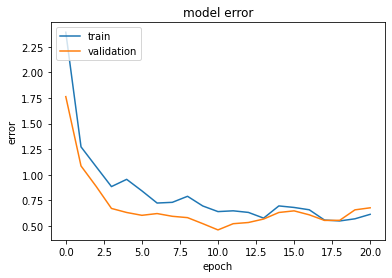

In [ ]:
plot_hist(model_history)

In [ ]:
# https://stackoverflow.com/questions/71704268/using-tf-keras-utils-image-dataset-from-directory-with-label-list
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
test_set = image_dataset_from_directory('../Data/test', image_size = (224,224), labels = 'inferred',label_mode = 'categorical')
yProb = model1.predict(test_set, verbose=1)
y_pred = np.argmax(yProb, axis =1).tolist()
y_true = []
oneHotLabel = np.concatenate([y for x, y in test_set], axis=0).tolist() # converting to list
for row in range(len(oneHotLabel)):
    for idx in range(len(oneHotLabel[row])):
        if oneHotLabel[row][idx] == 1.0:
            y_true.append(idx)
            break
print(classification_report(y_true, y_pred))

Found 171 files belonging to 20 classes.
6/6 [==============================] - 7s 837ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.38      0.33      0.35         9
           2       0.00      0.00      0.00         8
           3       0.12      0.12      0.12         8
           4       0.33      0.22      0.27         9
           5       0.00      0.00      0.00         9
           6       0.22      0.22      0.22         9
           7       0.12      0.11      0.12         9
           8       0.17      0.22      0.19         9
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         9
          12       0.25      0.22      0.24         9
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.

Epoch 1/50
26/26 - 260s - loss: 2.6114 - accuracy: 0.2225 - precision_4: 0.5000 - recall_4: 0.0786 - val_loss: 3.6375 - val_accuracy: 0.4944 - val_precision_4: 0.5380 - val_recall_4: 0.4775 - 260s/epoch - 10s/step
Epoch 2/50
26/26 - 254s - loss: 1.7656 - accuracy: 0.4619 - precision_4: 0.7147 - recall_4: 0.2757 - val_loss: 1.9955 - val_accuracy: 0.5899 - val_precision_4: 0.6352 - val_recall_4: 0.5674 - 254s/epoch - 10s/step
Epoch 3/50
26/26 - 254s - loss: 1.4563 - accuracy: 0.5405 - precision_4: 0.7323 - recall_4: 0.4002 - val_loss: 1.2888 - val_accuracy: 0.6910 - val_precision_4: 0.7378 - val_recall_4: 0.6798 - 254s/epoch - 10s/step
Epoch 4/50
26/26 - 254s - loss: 1.3032 - accuracy: 0.5828 - precision_4: 0.7452 - recall_4: 0.4704 - val_loss: 1.1889 - val_accuracy: 0.6910 - val_precision_4: 0.7362 - val_recall_4: 0.6742 - 254s/epoch - 10s/step
Epoch 5/50
26/26 - 255s - loss: 1.2897 - accuracy: 0.5852 - precision_4: 0.7233 - recall_4: 0.4837 - val_loss: 1.1108 - val_accuracy: 0.7416 - v

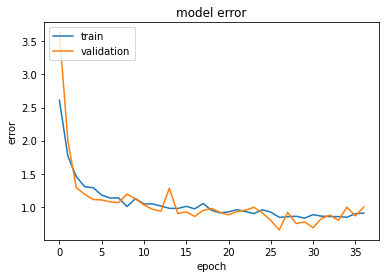

In [ ]:
tf.get_logger().setLevel('ERROR')
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
def buildVGG16model(num_classes):
    inputs = layers.Input(shape=(224,224,3))
    x = img_augmentation(inputs)
    x = tf.keras.applications.vgg16.preprocess_input(x)
    model = VGG16(include_top=False, input_tensor=x, weights="imagenet")
    model.trainable = False
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)
    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    layerA_out = layers.Dense(num_classes, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(layerA_out)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="vgg16")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model_metrics = ['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=model_metrics
    )
    return model
model2 = buildVGG16model(20)

# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,min_delta = 0.01,mode ="min",verbose=1)
vgg16_model_history = model2.fit(training_set, epochs=50, validation_data=val_set, verbose=2, batch_size =5, callbacks = [early_stopping])
plot_hist(vgg16_model_history)

# model2.summary()


In [ ]:
# classification report
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
test_set = image_dataset_from_directory('../Data/test', 
                                        image_size = (224,224), 
                                        labels = 'inferred',
                                        label_mode = 'categorical')

yProb = model2.predict(test_set, verbose=1)
y_pred = np.argmax(yProb, axis =1).tolist()
oneHotLabel = np.concatenate([y for x, y in test_set], axis=0).tolist()
y_true = []
for row in range(len(oneHotLabel)):
    for idx in range(len(oneHotLabel[row])):
        if oneHotLabel[row][idx] == 1.0:
            y_true.append(idx)
            break
print(classification_report(y_true, y_pred))

Found 171 files belonging to 20 classes.
6/6 [==============================] - 42s 7s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         8
           4       0.17      0.11      0.13         9
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         9
          10       0.20      0.22      0.21         9
          11       0.23      0.33      0.27         9
          12       0.00      0.00      0.00         9
          13       0.09      0.11      0.10         9
          14       0.00      0.00      0.00         9
          15       0.17      0.12      0.14

## **References and Citations :**
1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
2. https://www.tutorialspoint.com/python/os_listdir.htm
3. https://www.geeksforgeeks.org/python-os-listdir-method/
4. https://docs.python.org/3/library/glob.html
5. https://www.geeksforgeeks.org/delete-an-entire-directory-tree-using-python-shutil-rmtree-method/
6. https://docs.python.org/3/library/shutil.html
7. https://docs.python.org/3/library/os.html
8. https://www.geeksforgeeks.org/python-os-makedirs-method/
9. https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
10. https://keras.io/api/preprocessing/image/
11. https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0
12. https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D
13. https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16
14. https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
15. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
16. https://machinelearningmastery.com/image-augmentation-deep-learning-keras/